Percentage of modification: 0.00%


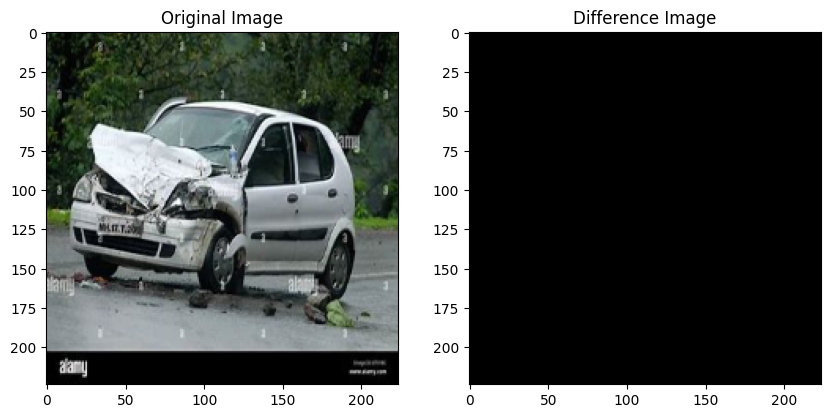

In [9]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match input size of CNN
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0  # Normalize the image
    return image

# Load and preprocess images
original_image = preprocess_image("C:/Users/nisha/Downloads/damage.jpeg")
modified_image = preprocess_image("C:/Users/nisha/Downloads/damage.jpeg")

# Convert images to grayscale
original_gray = cv2.cvtColor((original_image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
modified_gray = cv2.cvtColor((modified_image * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)

# Compute SSIM
score, diff = ssim(original_gray, modified_gray, full=True)
diff = (diff * 255).astype('uint8')

# Calculate percentage of change
diff_percentage = (1 - score) * 100
print(f"Percentage of modification: {diff_percentage:.2f}%")

# Threshold the difference image
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = cv2.cvtColor((original_image * 255).astype('uint8'), cv2.COLOR_RGB2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Display the original image with highlighted changes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Difference Image')
plt.imshow(diff, cmap='gray')
plt.show()
